In [208]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
#importing Dataset
working='/content/drive/MyDrive/Dataset/'
train=pd.read_csv(working + "train.csv")
test=pd.read_csv(working + "test.csv")

In [210]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring the Dataset

In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [213]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Duane, Mr. Frank",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [215]:
print(train.isnull().sum()/len(train)*100)
print(train.duplicated().sum() , "Duplicate Values")

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
0 Duplicate Values


# Data Cleaning

In [216]:
train.drop(['Name','Cabin','PassengerId','Ticket'],axis=1,inplace=True)
# These column doesn't give insight in training the dataset

In [217]:
train.shape

(891, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


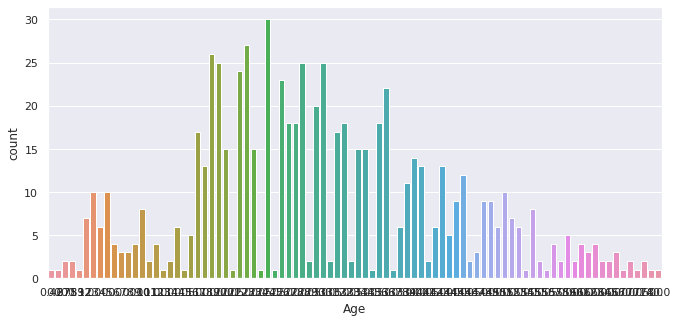

In [218]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(train['Age'])

In [219]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [220]:
train.dropna(inplace=True)

In [221]:
train.shape

(889, 8)

In [222]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [223]:
train['Sex'] = train['Sex'] .apply({'male':1, 'female':0}.get)

In [224]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [225]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [226]:
train=pd.get_dummies(train, columns = ['Embarked'],drop_first=True)

# Train Test Split

In [227]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [228]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,1
1,1,0,38.000000,1,0,71.2833,0,0
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,1
887,1,0,19.000000,0,0,30.0000,0,1
888,3,0,29.699118,1,2,23.4500,0,1
889,1,1,26.000000,0,0,30.0000,0,0


In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [230]:
print(X_train.shape,"X_train shape")
print(X_test.shape,"X_test shape")
print(y_train.shape,"y_train shape")
print(y_test.shape,"y_test shape")

(711, 8) X_train shape
(178, 8) X_test shape
(711,) y_train shape
(178,) y_test shape


# Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
logmodel = LogisticRegression(max_iter=1000,verbose=1)
logmodel.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [233]:
predictions = logmodel.predict(X_test)

In [234]:
from sklearn.metrics import classification_report

In [235]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



Prediction Accuracy by Logistic Regression is comes out to be 77%.

# Random Forest Classifier

In [236]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [237]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [238]:
pred=clf.predict(X_test)

In [239]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.75      0.83      0.79        69

    accuracy                           0.83       178
   macro avg       0.82      0.83      0.82       178
weighted avg       0.83      0.83      0.83       178



By Random Forest Classifier accuracy comes out to be 81%. So, I have done prediction of test data by this algorithm.

# Test data

In [240]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [241]:
print(test.isnull().sum()/len(train)*100)
print(test.duplicated().sum() , "Duplicate Values")

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.673791
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112486
Cabin          36.782902
Embarked        0.000000
dtype: float64
0 Duplicate Values


Test Data Cleaning and preprocessing

In [242]:
test.drop(['Name','Cabin','PassengerId','Ticket'],axis=1,inplace=True)
test['Age'].fillna((test['Age'].mean()), inplace=True)
test.dropna(inplace=True)
test['Sex'] = test['Sex'] .apply({'male':1, 'female':0}.get)
test=pd.get_dummies(test, columns = ['Embarked'],drop_first=True)

In [243]:
test.shape

(417, 8)

In [244]:
pred_test=clf.predict(test)

Prediction on Test Data

In [245]:
pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,